# LendingClub Loan Prediction

---

LendingClub is a US peer-to-peer lending company, headquartered in San Francisco, California. It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market. Lending Club operates an online lending platform that enables borrowers to obtain a loan, and investors to purchase notes backed by payments made on loans.

# 1. Environment Setup

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats
df = pd.read_csv('/Users/ranxindeng/Desktop/UC Berkeley/210_code/dataset/loan.csv')
df.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,...,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,loan_status
0,1077501,5000,5000,4975.0,36 months,10.65,162.87,B,10+ years,RENT,...,13648,83.7,9,0,0,5861.071414,5831.78,5000.00,861.07,Fully Paid
1,1077430,2500,2500,2500.0,60 months,15.27,59.83,C,Less than 1 year,RENT,...,1687,9.4,4,0,0,1008.710000,1008.71,456.46,435.17,Charged Off
2,1077175,2400,2400,2400.0,36 months,15.96,84.33,C,10+ years,RENT,...,2956,98.5,10,0,0,3003.653644,3003.65,2400.00,603.65,Fully Paid
3,1076863,10000,10000,10000.0,36 months,13.49,339.31,C,10+ years,RENT,...,5598,21.0,37,0,0,12226.302210,12226.30,10000.00,2209.33,Fully Paid
4,1075269,5000,5000,5000.0,36 months,7.90,156.46,A,3 years,RENT,...,7963,28.3,12,0,0,5631.377753,5631.38,5000.00,631.38,Fully Paid


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9004 entries, 0 to 9003
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   9004 non-null   int64  
 1   loan_amnt            9004 non-null   int64  
 2   funded_amnt          9004 non-null   int64  
 3   funded_amnt_inv      9004 non-null   float64
 4   term                 9004 non-null   object 
 5   int_rate             9004 non-null   float64
 6   installment          9004 non-null   float64
 7   grade                9004 non-null   object 
 8   emp_length           8688 non-null   object 
 9   home_ownership       9004 non-null   object 
 10  annual_inc           9004 non-null   float64
 11  verification_status  9004 non-null   object 
 12  purpose              9004 non-null   object 
 13  addr_state           9004 non-null   object 
 14  dti                  9004 non-null   float64
 15  earliest_cr_line     9004 non-null   i

# 2. Data Exploration

## 2.1. Understanding the Raw Dataset

description of each fields:

LoanStatNew	 | Description
--- | ---
addr_state	|The state provided by the borrower in the loan application
annual_inc|	The annual income provided by the borrower during registration.
dti	| A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.
earliest_cr_line	|The month the borrower’s earliest reported credit line was opened
funded_amnt |	The total amount committed to that loan at that point in time.
funded_amnt_inv|	The total amount committed by investors for that loan at that point in time.
grade |	LC assigned loan grade
home_ownership|	The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER.
inq_last_6mths |	The number of inquiries by creditors during the past 6 months.
installment	| The monthly payment owed by the borrower if the loan originates.
int_rate |	Interest Rate on the loan
loan_amnt |	The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.
loan_status |	Current status of the loan
open_acc	| The number of open credit lines in the borrower’s credit file.
out_prncp |	Remaining outstanding principal for total amount funded
out_prncp_inv	| Remaining outstanding principal for portion of total amount funded by investors
pub_rec	|Number of derogatory public records
purpose	| A category provided by the borrower for the loan request.
revol_bal |	Total credit revolving balance
revol_util|	Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.
term	| The number of payments on the loan. Values are in months and can be either 36 or 60.
total_acc	| The total number of credit lines currently in the borrower’s credit file

In [3]:
df.describe()

,id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,earliest_cr_line,inq_last_6mths,...,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int
count,9.004000e+03,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9.004000e+03,9004.000000,9004.000000,9004.000000,...,9004.000000,9004.000000,9001.000000,9004.000000,9004.0,9004.0,9004.000000,9004.000000,9004.000000,9004.000000
mean,9.632337e+05,12291.884163,12154.156486,12076.054639,12.126728,357.478229,6.957693e+04,13.889958,37300.462794,0.857175,...,0.047423,13658.416148,52.368789,22.438583,0.0,0.0,13037.547635,12943.841207,10563.492623,2328.716827
std,7.953238e+04,8285.682170,8096.937145,8033.211335,4.195740,227.180439,4.885841e+04,6.609968,4379.652217,1.043980,...,0.215667,15038.825421,27.644807,11.146531,0.0,0.0,9838.298075,9743.909609,7946.456673,2650.982007
min,4.581650e+05,1000.000000,1000.000000,750.000000,5.420000,30.160000,6.000000e+03,0.000000,19998.000000,0.000000,...,0.000000,0.000000,0.000000,3.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
25%,8.778840e+05,6000.000000,6000.000000,6000.000000,8.490000,187.750000,4.200000e+04,8.860000,34455.000000,0.000000,...,0.000000,4559.750000,30.500000,14.000000,0.0,0.0,5802.197477,5779.940000,4800.000000,682.042500
50%,9.879685e+05,10000.000000,10000.000000,10000.000000,11.710000,312.910000,6.000000e+04,13.940000,36161.000000,1.000000,...,0.000000,9889.000000,54.700000,21.000000,0.0,0.0,10623.210000,10577.545000,8650.000000,1367.130000
75%,1.033607e+06,16000.000000,16000.000000,15975.000000,15.230000,469.360000,8.300000e+04,19.082500,42827.000000,1.000000,...,0.000000,17468.250000,75.000000,29.000000,0.0,0.0,17354.405075,17225.490000,14500.000000,2881.767500
max,1.077501e+06,35000.000000,35000.000000,35000.000000,24.110000,1288.100000,1.782000e+06,29.920000,43076.000000,8.000000,...,2.000000,148804.000000,99.900000,79.000000,0.0,0.0,56809.051630,56475.050000,35000.010000,21809.050000


In [4]:
df.nunique()

id                     9004
loan_amnt               604
funded_amnt             681
funded_amnt_inv        1234
term                      2
int_rate                 70
installment            3871
grade                     7
emp_length               11
home_ownership            3
annual_inc             1555
verification_status       3
purpose                  13
addr_state               45
dti                    2559
earliest_cr_line        458
inq_last_6mths            9
open_acc                 33
pub_rec                   3
revol_bal              7573
revol_util             1023
total_acc                63
out_prncp                 1
out_prncp_inv             1
total_pymnt            8962
total_pymnt_inv        8942
total_rec_prncp        2199
total_rec_int          8838
loan_status               2
dtype: int64

In [5]:
df.isna().sum()

id                       0
loan_amnt                0
funded_amnt              0
funded_amnt_inv          0
term                     0
int_rate                 0
installment              0
grade                    0
emp_length             316
home_ownership           0
annual_inc               0
verification_status      0
purpose                  0
addr_state               0
dti                      0
earliest_cr_line         0
inq_last_6mths           0
open_acc                 0
pub_rec                  0
revol_bal                0
revol_util               3
total_acc                0
out_prncp                0
out_prncp_inv            0
total_pymnt              0
total_pymnt_inv          0
total_rec_prncp          0
total_rec_int            0
loan_status              0
dtype: int64

In [6]:
# check the distribution of target variable loan_status
df.loc[:,'loan_status'].value_counts()

loan_status
Fully Paid     7487
Charged Off    1517
Name: count, dtype: int64

## 2.2 EDA

[Text(0.5, 0, 'funded_amnt_inv'),
 Text(1.5, 0, 'int_rate'),
 Text(2.5, 0, 'installment'),
 Text(3.5, 0, 'annual_inc'),
 Text(4.5, 0, 'dti'),
 Text(5.5, 0, 'revol_util'),
 Text(6.5, 0, 'total_pymnt'),
 Text(7.5, 0, 'total_pymnt_inv'),
 Text(8.5, 0, 'total_rec_prncp'),
 Text(9.5, 0, 'total_rec_int')]

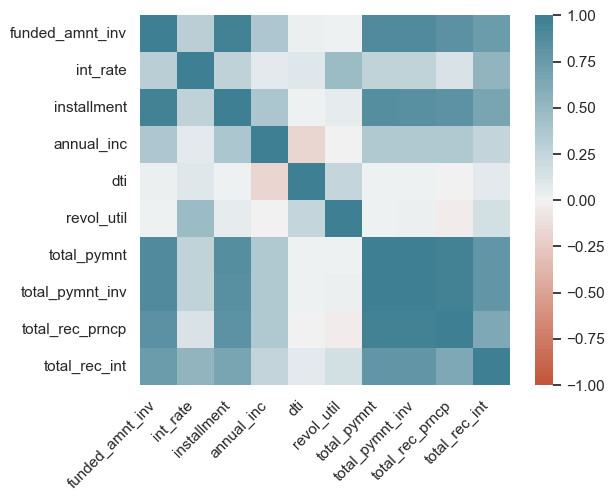

In [7]:
# correlation heat map of numerical features
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

numCol = []
for col in df:
  if df[col].dtype == float:
    numCol.append(col)
corr = df[numCol].corr()

ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right')


In [8]:
# check the actual values of correlations
corr_score = df[numCol].corr()
corr_score

,funded_amnt_inv,int_rate,installment,annual_inc,dti,revol_util,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int
funded_amnt_inv,1.000000,0.302945,0.959195,0.371554,0.025192,0.022395,0.884368,0.885395,0.829373,0.734486
int_rate,0.302945,1.000000,0.267857,0.076103,0.091614,0.470893,0.259296,0.258493,0.124425,0.531955
installment,0.959195,0.267857,1.000000,0.385192,0.017451,0.056484,0.859719,0.859358,0.827792,0.660184
annual_inc,0.371554,0.076103,0.385192,1.000000,-0.176920,-0.005319,0.366455,0.364869,0.365577,0.253143
dti,0.025192,0.091614,0.017451,-0.176920,1.000000,0.243479,0.020130,0.019860,-0.004552,0.077365
revol_util,0.022395,0.470893,0.056484,-0.005319,0.243479,1.000000,0.022241,0.024014,-0.036570,0.171383
total_pymnt,0.884368,0.259296,0.859719,0.366455,0.020130,0.022241,1.000000,0.998224,0.968533,0.795019
total_pymnt_inv,0.885395,0.258493,0.859358,0.364869,0.019860,0.024014,0.998224,1.000000,0.966596,0.794365
total_rec_prncp,0.829373,0.124425,0.827792,0.365577,-0.004552,-0.036570,0.968533,0.966596,1.000000,0.634057
total_rec_int,0.734486,0.531955,0.660184,0.253143,0.077365,0.171383,0.795019,0.794365,0.634057,1.000000


Some corresponding features (like total_pymnt and total_pymnt_inv) have high correlation.

<Axes: ylabel='purpose'>

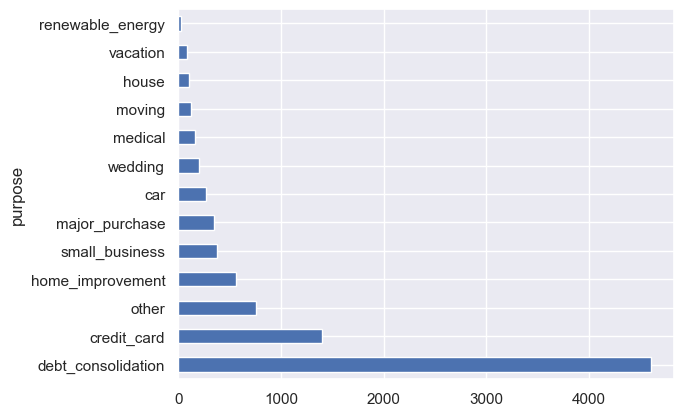

In [9]:
# explore purpose category
df["purpose"].value_counts().plot(kind='barh')

<Axes: title={'center': 'LC Loan Amount'}, xlabel='loan_amnt'>

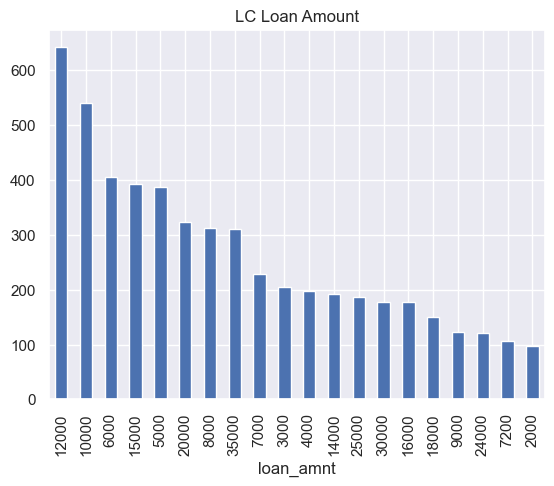

In [10]:
# explore purpose category
df["loan_amnt"].value_counts()[:20].plot(kind='bar', title="LC Loan Amount")

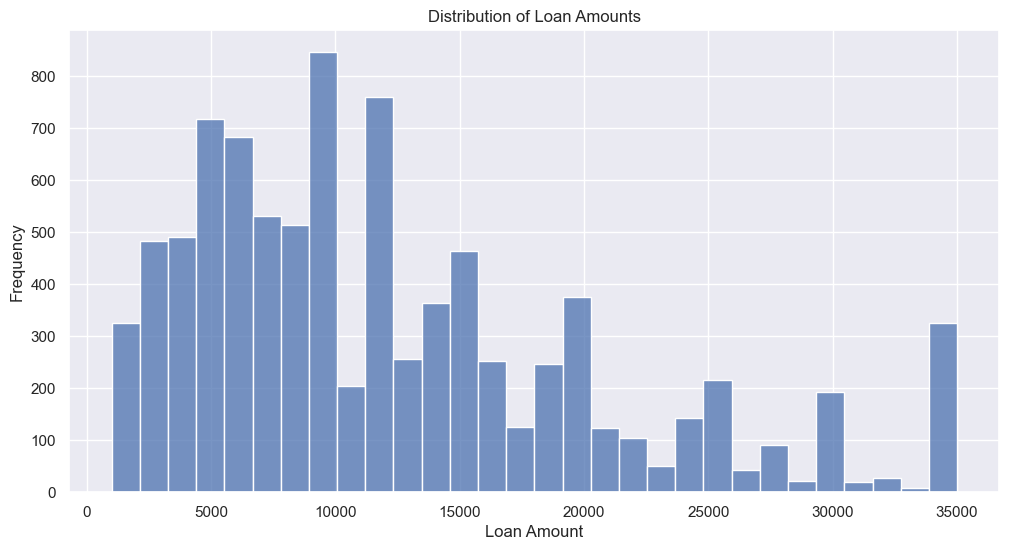

In [11]:
# prompt: create a chart of loan_amnt

plt.figure(figsize=(12, 6))
sns.histplot(df['loan_amnt'], bins=30)
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Loan Amounts')
plt.show()

<Axes: title={'center': 'LC Loan Amount'}, xlabel='loan_amnt'>

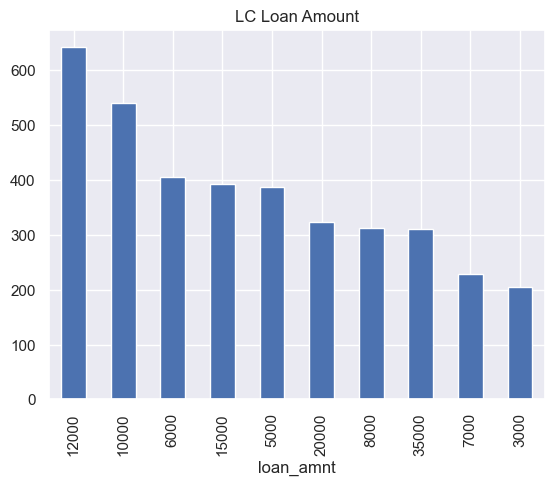

In [12]:
df["loan_amnt"].value_counts()[:10].plot(kind='bar', title="LC Loan Amount")

<Axes: xlabel='home_ownership'>

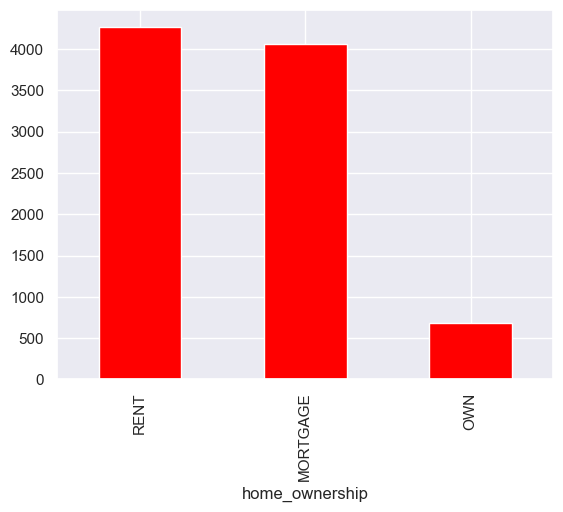

In [13]:
# explore purpose category
df["home_ownership"].value_counts().plot(kind='bar', color='red')

<Axes: ylabel='count'>

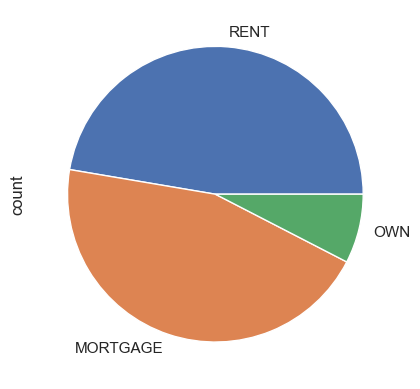

In [14]:
df["home_ownership"].value_counts().plot(kind='pie')

<Axes: xlabel='emp_length'>

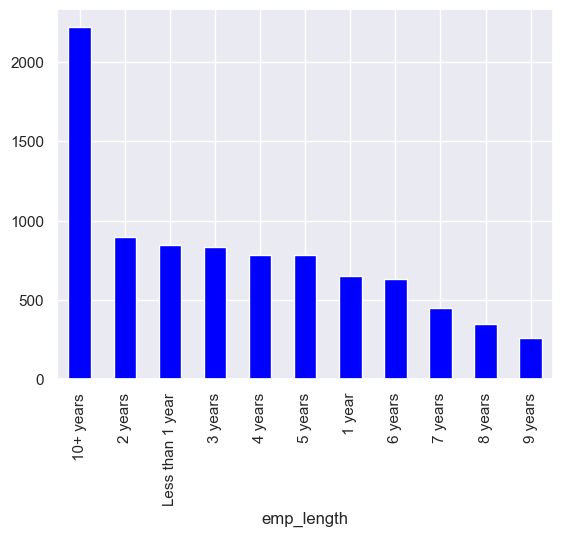

In [15]:
df["emp_length"].value_counts().plot(kind='bar', color='blue')

In [16]:
# total loan amount issued by State
df_location = df.groupby("addr_state",).sum().reset_index()
df_location = df_location.filter(["addr_state", "loan_amnt"], axis = 1)

df_location.head()

,addr_state,loan_amnt
0,AK,359675
1,AL,1308425
2,AR,753275
3,AZ,2477200
4,CA,20470425


In [17]:
# prompt: using plotly.graph_objects, based on df_location,  locationmode is USA-states, generate a US map to show the loan_amnt for each state in addr_state column.

import plotly.graph_objects as go

fig = go.Figure(data=go.Choropleth(
    locations=df_location['addr_state'], # Spatial coordinates
    z = df_location['loan_amnt'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Reds',
    colorbar_title = "Loan Amount",
))

fig.update_layout(
    title_text = 'Loan Amount by State',
    geo_scope='usa', # limite map scope to USA
)

fig.show()

<Axes: xlabel='grade', ylabel='count'>

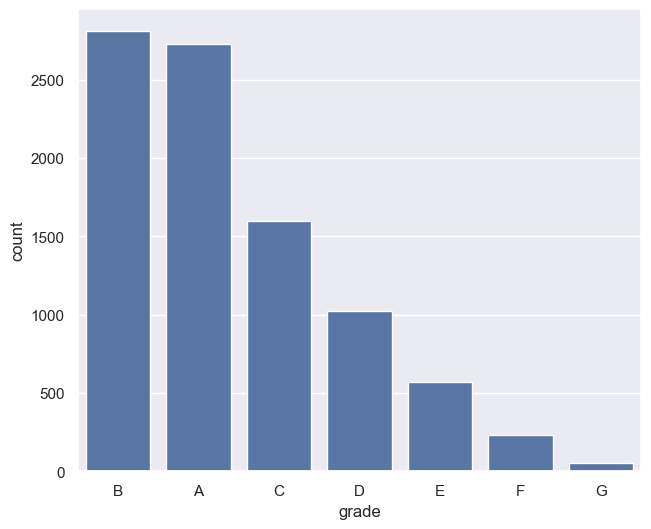

In [18]:
# grade distribution plot
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
sns.countplot(x="grade", data= df, order = df['grade'].value_counts().index)

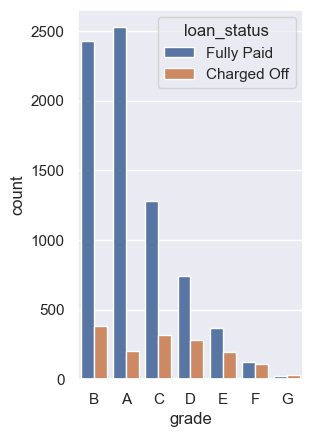

In [19]:
# prompt: generate bar chart to compare df, based on loan_status, and separated by grade.

plt.subplot(1, 2, 2)
sns.countplot(x="grade", data= df, hue="loan_status", order = df['grade'].value_counts().index)
plt.show()

<Axes: xlabel='loan_status', ylabel='count'>

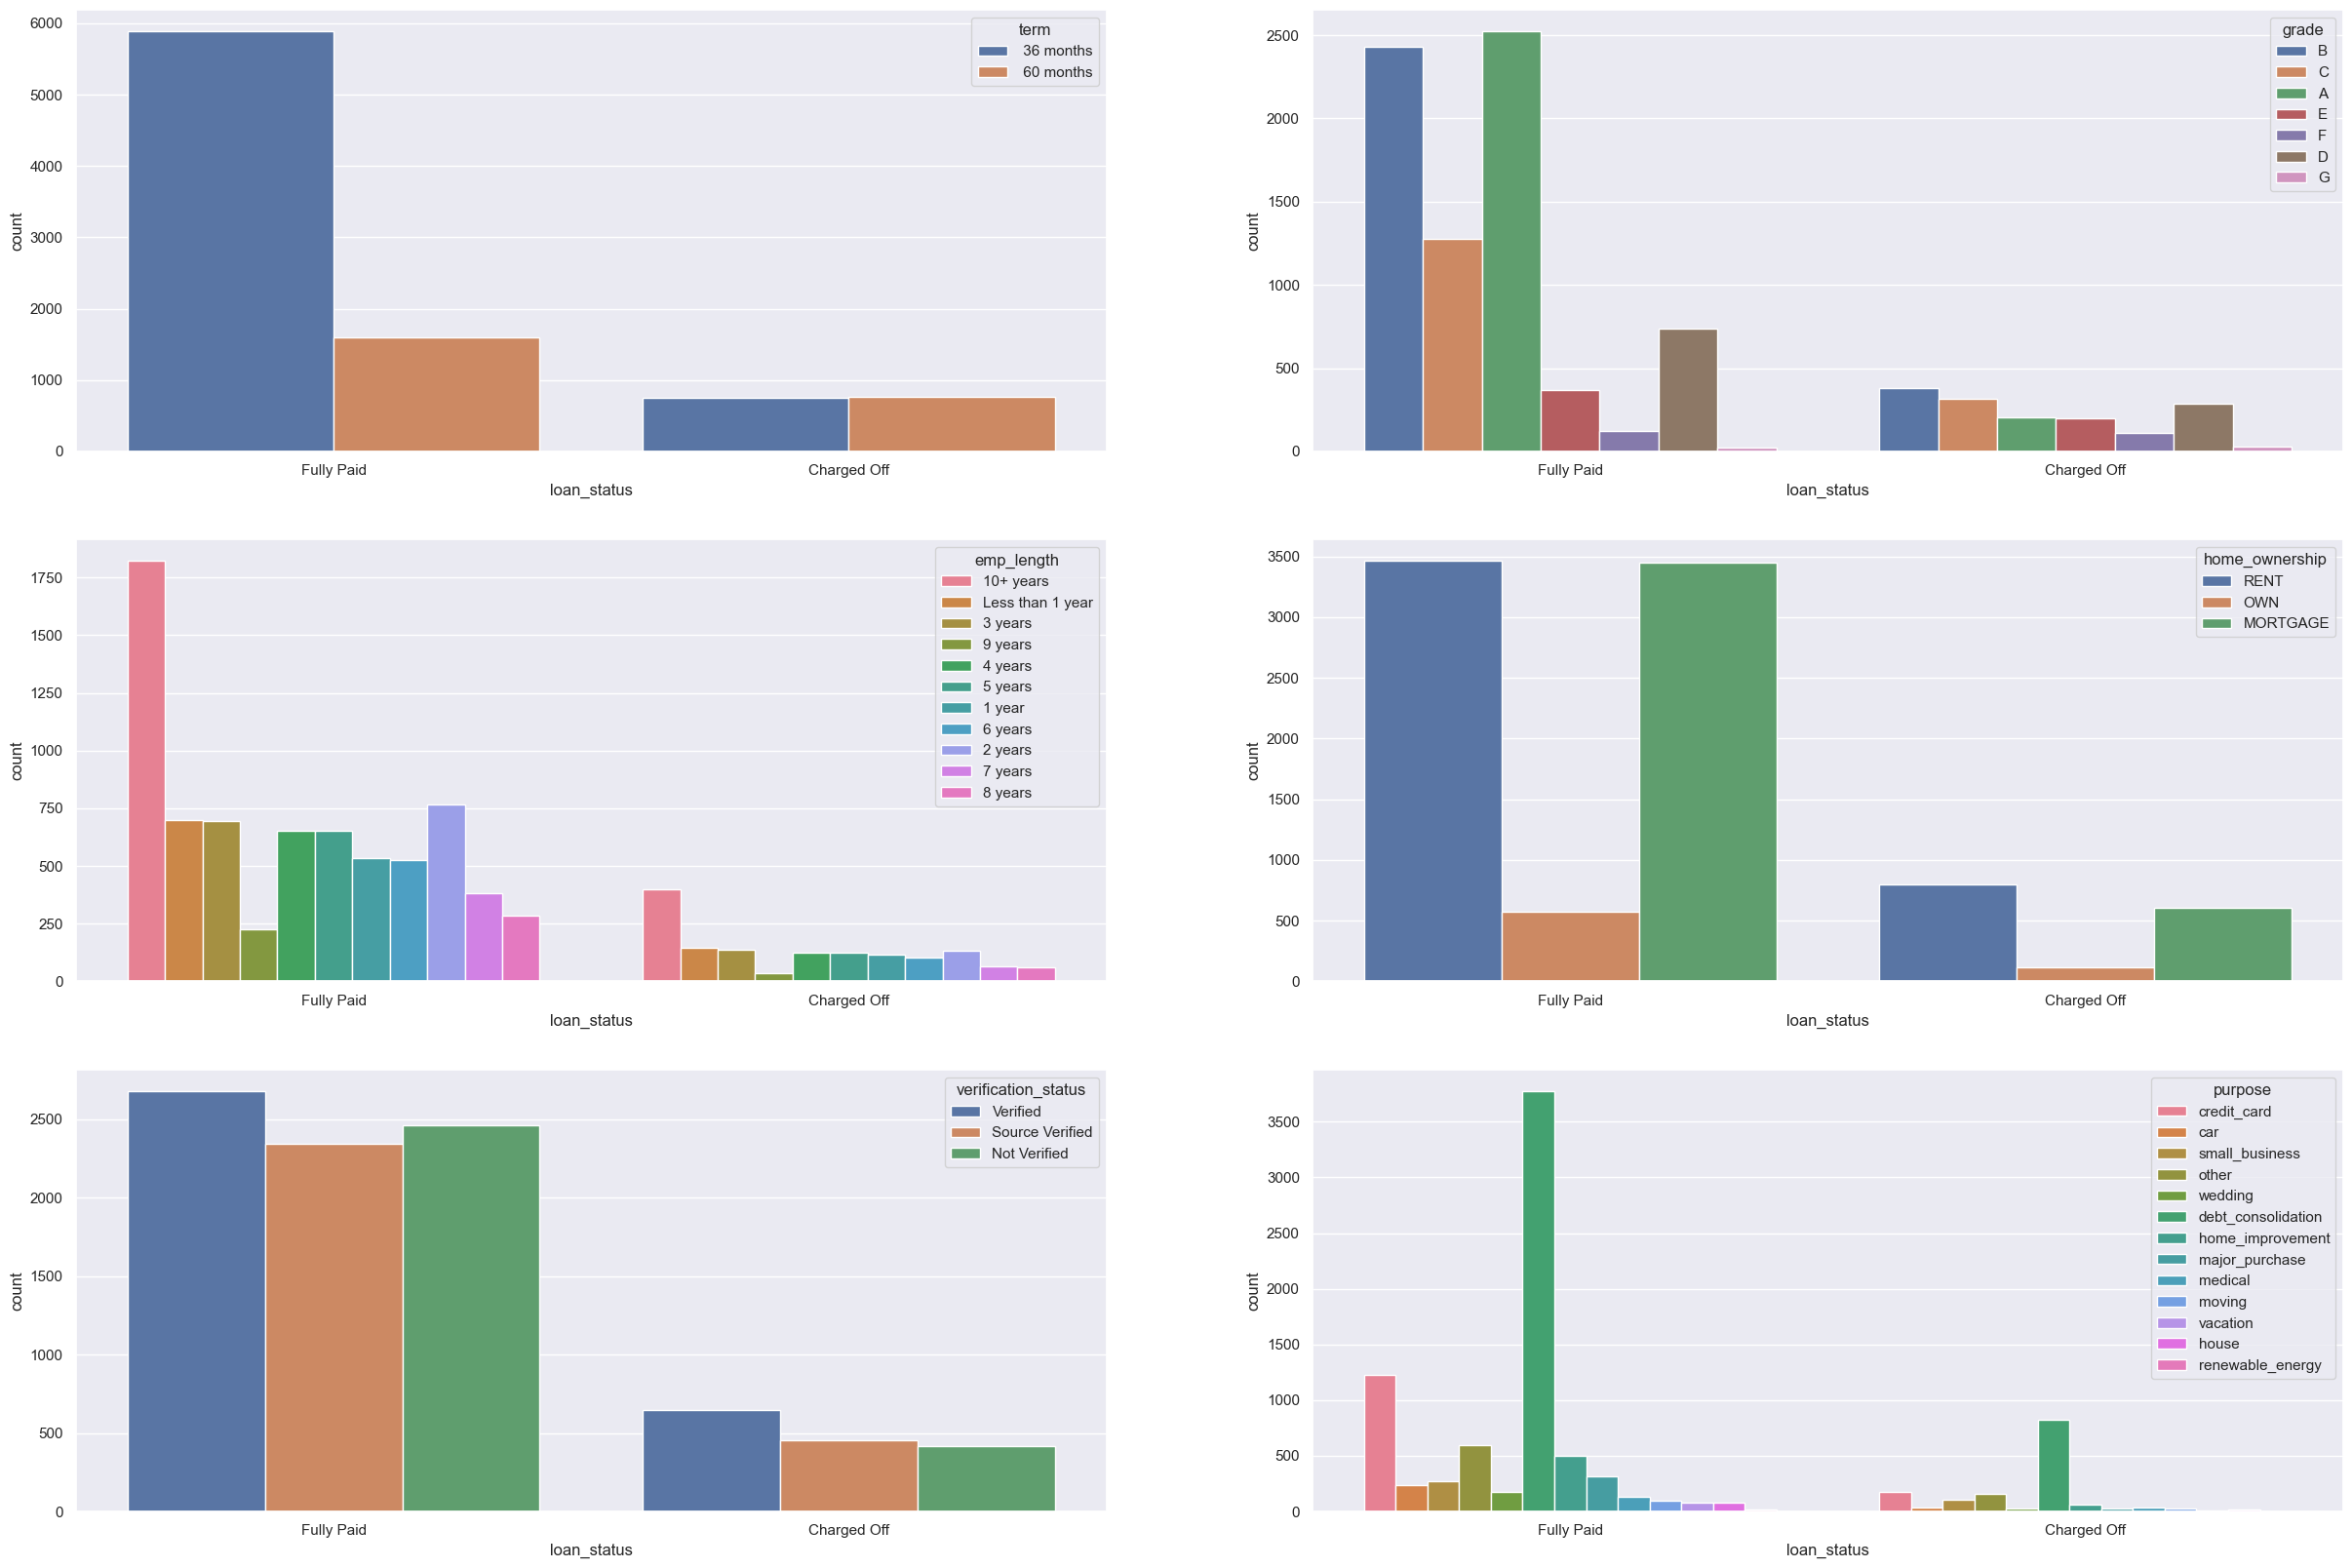

In [20]:
# understand categorical feature
_,axss = plt.subplots(3,2, figsize=[30,20])
sns.countplot(x='loan_status', hue='term', data=df, ax=axss[0][0])
sns.countplot(x='loan_status', hue='grade', data=df, ax=axss[0][1])
sns.countplot(x='loan_status', hue='emp_length', data=df, ax=axss[1][0])
sns.countplot(x='loan_status', hue='home_ownership', data=df, ax=axss[1][1])
sns.countplot(x='loan_status', hue='verification_status', data=df, ax=axss[2][0])
sns.countplot(x='loan_status', hue='purpose', data=df, ax=axss[2][1])

# 3. Data Cleaning and Feature Preprocessing

## 3.1. Data Cleaning

In [21]:
# Data Cleaning / Integration
class_mapping = {label:idx for idx, label in enumerate(np.unique(df['term']))}
df['term']=df['term'].map(class_mapping)
class_mapping = {label:idx for idx, label in enumerate(np.unique(df['grade']))}
df['grade']=df['grade'].map(class_mapping)
class_mapping = {label:idx for idx, label in enumerate(np.unique(df['home_ownership']))}
df['home_ownership']=df['home_ownership'].map(class_mapping)

class_mapping = {label:idx for idx, label in enumerate(np.unique(df['verification_status']))}
df['verification_status']=df['verification_status'].map(class_mapping)

class_mapping = {label:idx for idx, label in enumerate(np.unique(df['purpose']))}
df['purpose']=df['purpose'].map(class_mapping)

class_mapping = {label:idx for idx, label in enumerate(np.unique(df['addr_state']))}
df['addr_state']=df['addr_state'].map(class_mapping)

class_mapping = {'Fully Paid' : 0, 'Charged Off' : 1}
df['loan_status']=df['loan_status'].map(class_mapping)

df.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,...,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,loan_status
0,1077501,5000,5000,4975.0,0,10.65,162.87,1,10+ years,2,...,13648,83.7,9,0,0,5861.071414,5831.78,5000.00,861.07,0
1,1077430,2500,2500,2500.0,1,15.27,59.83,2,Less than 1 year,2,...,1687,9.4,4,0,0,1008.710000,1008.71,456.46,435.17,1
2,1077175,2400,2400,2400.0,0,15.96,84.33,2,10+ years,2,...,2956,98.5,10,0,0,3003.653644,3003.65,2400.00,603.65,0
3,1076863,10000,10000,10000.0,0,13.49,339.31,2,10+ years,2,...,5598,21.0,37,0,0,12226.302210,12226.30,10000.00,2209.33,0
4,1075269,5000,5000,5000.0,0,7.90,156.46,0,3 years,2,...,7963,28.3,12,0,0,5631.377753,5631.38,5000.00,631.38,0


In [22]:
# deal with missing value
df = df.select_dtypes(include=[np.number]).interpolate().dropna()
# drop high correlation and high variance colums
df = df.drop(["total_pymnt"], axis=1)
df = df.drop(["total_pymnt_inv"], axis=1)
df = df.drop(["total_rec_int"], axis=1)
df = df.drop(["id"], axis=1)
df = df.drop(["total_rec_prncp"], axis=1)

df.head(10)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,home_ownership,annual_inc,verification_status,...,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,loan_status
0,5000,5000,4975.0,0,10.65,162.87,1,2,24000.0,2,...,31048,1,3,0,13648,83.7,9,0,0,0
1,2500,2500,2500.0,1,15.27,59.83,2,2,30000.0,1,...,36251,5,3,0,1687,9.4,4,0,0,1
2,2400,2400,2400.0,0,15.96,84.33,2,2,12252.0,0,...,43040,2,2,0,2956,98.5,10,0,0,0
3,10000,10000,10000.0,0,13.49,339.31,2,2,49200.0,1,...,35096,1,10,0,5598,21.0,37,0,0,0
4,5000,5000,5000.0,0,7.90,156.46,0,2,36000.0,1,...,43043,3,9,0,7963,28.3,12,0,0,0
5,3000,3000,3000.0,0,18.64,109.43,4,2,48000.0,1,...,42742,2,4,0,8221,87.5,4,0,0,0
6,5600,5600,5600.0,1,21.28,152.39,5,1,40000.0,1,...,42829,2,11,0,5210,32.6,13,0,0,1
7,5375,5375,5350.0,1,12.69,121.45,1,2,15000.0,2,...,42982,0,2,0,9279,36.5,3,0,0,1
8,6500,6500,6500.0,1,14.65,153.45,2,1,72000.0,0,...,35796,2,14,0,4032,20.6,23,0,0,0
9,12000,12000,12000.0,0,12.69,402.54,1,1,75000.0,1,...,32782,0,12,0,23336,67.1,34,0,0,0


## 3.2. Data Split

In [23]:
# split dataset
from sklearn.model_selection import train_test_split

yPredict = df.loan_status
XClean = df.drop(["loan_status"], axis=1)

# Reserve 25% for testing
X_train, X_test, y_train, y_test = train_test_split(XClean, yPredict, random_state=42, test_size=.25)

In [24]:
X_train.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,home_ownership,annual_inc,verification_status,...,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv
7442,14400,14400,14400.0,1,19.29,375.85,4,1,150000.0,1,...,4.88,43009,1,8,0,3859,52.8,26,0,0
8145,7000,7000,7000.0,0,5.42,211.12,0,1,45000.0,1,...,7.36,42738,0,8,0,11237,68.9,16,0,0
1434,1325,1325,1325.0,0,6.62,40.69,0,1,39456.0,0,...,26.22,36557,1,9,0,10791,43.8,29,0,0
2777,12000,12000,12000.0,0,6.62,368.45,0,2,60000.0,0,...,8.86,36161,1,9,0,10170,23.8,29,0,0
1867,16000,16000,15975.0,1,15.27,382.92,2,0,45200.0,2,...,19.67,33482,3,7,0,14750,58.5,17,0,0


In [25]:
y_train.head()

7442    0
8145    0
1434    0
2777    1
1867    0
Name: loan_status, dtype: int64

## 3.3. Data Preprocessing

In [26]:
# transform file
# standardization
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# 4. Model Training and Selection

## 4.1. RandomForest/ Kneighbors/ LogisticRegression

## 4.1.1. Build Models

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Logistic Regression
classifier_logistic = LogisticRegression()

# K Nearest Neighbors
classifier_KNN = KNeighborsClassifier()

# Random Forest
classifier_RF = RandomForestClassifier()

In [28]:
classifier_logistic.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [29]:
from sklearn.metrics import classification_report,confusion_matrix
prediction_Regression = classifier_logistic.predict(X_test)
print(classification_report(y_test,prediction_Regression))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91      1872
           1       0.64      0.06      0.10       379

    accuracy                           0.84      2251
   macro avg       0.74      0.52      0.51      2251
weighted avg       0.80      0.84      0.77      2251



In [30]:
classifier_KNN.fit(X_train, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [31]:
prediction_KNN = classifier_KNN.predict(X_test)
print(classification_report(y_test,prediction_KNN))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90      1872
           1       0.43      0.15      0.22       379

    accuracy                           0.82      2251
   macro avg       0.64      0.55      0.56      2251
weighted avg       0.78      0.82      0.79      2251



In [32]:
classifier_RF.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [33]:
prediction_RF = classifier_RF.predict(X_test)
print(classification_report(y_test,prediction_RF))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91      1872
           1       0.54      0.07      0.12       379

    accuracy                           0.83      2251
   macro avg       0.69      0.53      0.51      2251
weighted avg       0.79      0.83      0.77      2251



## 4.1.2. Cross Validation

In [34]:
# Use 5-fold Cross Validation to get the accuracy for different models
from sklearn import model_selection

model_names = ['Logistic Regression','KNN','Random Forest']
model_list = [classifier_logistic, classifier_KNN, classifier_RF]
count = 0

for classifier in model_list:
    cv_score = model_selection.cross_val_score(classifier, X_train, y_train, cv=5)
    print(cv_score)
    print('Model accuracy of ' + model_names[count] + ' is ' + str(cv_score.mean()))
    count += 1

[0.83641747 0.83271651 0.83641747 0.82666667 0.83851852]
Model accuracy of Logistic Regression is 0.8341473257120926
[0.80977054 0.80754996 0.80977054 0.80148148 0.81555556]
Model accuracy of KNN is 0.8088256161416784
[0.82605477 0.8238342  0.82827535 0.82444444 0.83259259]
Model accuracy of Random Forest is 0.827040271952189


Logistic Regression has the best performance in these three models.

## 4.2. Other Models - SVM

In [35]:
from sklearn.svm import SVC

classifier_SVC = SVC()

cv_score = model_selection.cross_val_score(classifier_SVC, X_train, y_train, cv=5)
print('Model accuracy of SVM is: ' + str(cv_score.mean()))

Model accuracy of SVM is: 0.8319266387038409


## 4.3. Other Models - Neural Network

In [36]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(30,30,30))
mlp.fit(X_train,y_train)

/Users/ranxindeng/Desktop/UC Berkeley/210_code/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



,hidden_layer_sizes,"(30, ...)"
,activation,'relu'
,solver,'adam'
,alpha,0.0001
,batch_size,'auto'
,learning_rate,'constant'
,learning_rate_init,0.001
,power_t,0.5
,max_iter,200
,shuffle,True
,random_state,None


In [37]:
predictions = mlp.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictions))

[[1704  168]
 [ 289   90]]


In [38]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1872
           1       0.35      0.24      0.28       379

    accuracy                           0.80      2251
   macro avg       0.60      0.57      0.58      2251
weighted avg       0.77      0.80      0.78      2251



# 5. Feature Importance

In [39]:
X_with_corr = XClean.copy()
X_with_corr.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,home_ownership,annual_inc,verification_status,...,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv
0,5000,5000,4975.0,0,10.65,162.87,1,2,24000.0,2,...,27.65,31048,1,3,0,13648,83.7,9,0,0
1,2500,2500,2500.0,1,15.27,59.83,2,2,30000.0,1,...,1.00,36251,5,3,0,1687,9.4,4,0,0
2,2400,2400,2400.0,0,15.96,84.33,2,2,12252.0,0,...,8.72,43040,2,2,0,2956,98.5,10,0,0
3,10000,10000,10000.0,0,13.49,339.31,2,2,49200.0,1,...,20.00,35096,1,10,0,5598,21.0,37,0,0
4,5000,5000,5000.0,0,7.90,156.46,0,2,36000.0,1,...,11.20,43043,3,9,0,7963,28.3,12,0,0


In [40]:
y=yPredict.copy()

In [41]:
# check feature importance of random forest for feature selection
forest = RandomForestClassifier()
forest.fit(XClean, yPredict)

importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature importance ranking by Random Forest Model:")
for ind in range(XClean.shape[1]):
  print ("{0} : {1}".format(XClean.columns[indices[ind]],round(importances[indices[ind]], 4)))

Feature importance ranking by Random Forest Model:
annual_inc : 0.0815
revol_util : 0.0792
dti : 0.0767
earliest_cr_line : 0.0762
int_rate : 0.0757
revol_bal : 0.0739
installment : 0.0641
total_acc : 0.0604
addr_state : 0.0548
funded_amnt_inv : 0.0543
open_acc : 0.049
funded_amnt : 0.0449
loan_amnt : 0.0447
purpose : 0.0357
grade : 0.0327
term : 0.0325
inq_last_6mths : 0.025
verification_status : 0.0181
home_ownership : 0.0143
pub_rec : 0.0062
out_prncp : 0.0
out_prncp_inv : 0.0


In [42]:
# add L1 regularization to logistic regression
# check the coef for feature selection
scaler = StandardScaler()
X_l1 = scaler.fit_transform(X_with_corr)
LRmodel_l1 = LogisticRegression(penalty="l1", C = 10, solver='liblinear')
LRmodel_l1.fit(X_l1, yPredict)

indices = np.argsort(abs(LRmodel_l1.coef_[0]))[::-1]

print ("Logistic Regression (L1) Coefficients")
for ind in range(X_with_corr.shape[1]):
  print ("{0} : {1}".format(X_with_corr.columns[indices[ind]],round(LRmodel_l1.coef_[0][indices[ind]], 4)))

Logistic Regression (L1) Coefficients
int_rate : 0.5644
annual_inc : -0.5007
term : 0.4155
funded_amnt : -0.3842
funded_amnt_inv : 0.2926
purpose : 0.2064
revol_util : 0.1436
loan_amnt : 0.1353
grade : -0.1148
inq_last_6mths : 0.0983
verification_status : -0.0807
home_ownership : 0.0751
earliest_cr_line : -0.0649
addr_state : -0.062
pub_rec : 0.0601
open_acc : 0.0585
total_acc : -0.0555
installment : 0.0503
dti : 0.0319
revol_bal : -0.0023
out_prncp : 0.0
out_prncp_inv : 0.0
